<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml03_train_test_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 훈련 셋과 테스트 셋을 나누는 방법
    * 순차 추출(sequential sampling)
    * 임의 추출(random sampling)
    * 층화 추출(stratified sampling)
* 분류 모델의 평가 지표(metrics)
    * 정확도(accuracy)
    * 정밀도(precision)
    * 재현율(recall)
    * F1 score
* 특성 스케일링(feature scaling)
    * 표준화(standardiztion)
    * 정규화(normalization)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier  # 머신러닝 모델
from sklearn.model_selection import train_test_split    # 훈련/테스트 셋 분리 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 변환기(특성 스케일링)

# 데이터셋 준비

fish 데이터셋 - 도미(Bream)/빙어(Smelt) 분류

In [8]:
file_path ='https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [9]:
fish = pd.read_csv(file_path)

In [10]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [12]:
df = fish.loc[fish.Species.isin(['Bream', 'Smelt']), ['Species', 'Weight', 'Length']]

In [14]:
pd.options.display.max_rows = 10

In [15]:
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [16]:
# 특성 배열
X = df[['Weight', 'Length']].values

In [19]:
X[:5, :]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [20]:
# 타겟 배열(레이블)
y = df['Species'].values

In [21]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# 훈련 셋/ 테스트 셋 분리

* 머신 러닝 : 컴퓨터가 데이터를 학습해서 스스로 예측.
* 학습/훈련 : 머신 러닝 알고리즘(모델)에게 데이터(와 레이블)을 제공.
* 평가 : 학습되지 않은 데이터를 얼마나 잘 예측.
* 훈련 셋 : 모델에게 제공할 데이터(와 레이블).
* 테스트 셋 : 모델에게 제공하지 않고, 학습되지 않은 데이터를 얼마나 잘 예측하는지 평가하기 위해 남겨두는 데이터(와 레이블)

## 순차 추출(sequential sampling)

In [24]:
num_trains = 35     # 훈련 셋의 샘플 개수 - 전체 데이터셋의 약 70% 샘플링.

In [25]:
X_train = X[:num_trains, :] # 훈련 셋
X_test = X[num_trains:, :]  # 테스트 셋

In [26]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [27]:
y_train = y[:num_trains] # 훈련 레이블(타겟)
y_test = y[num_trains:]  # 테스트 레이블(타겟)

In [28]:
y_train.shape

(35,)

In [29]:
y_test.shape

(14,)

In [31]:
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [32]:
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

정렬된 데이터셋을 사용하는 경우 훈련되지 않는 레이블들이 있을 수 있음.

In [33]:
knn = KNeighborsClassifier()    # 모델 생성

In [40]:
knn.fit(X_train, y_train)   # 훈련 셋으로 훈련(학습)

KNeighborsClassifier()

In [37]:
train_acc = knn.score(X_train, y_train)     # 훈련 셋에서의 정확도
train_acc

1.0

In [38]:
test_acc = knn.score(X_test, y_test)        # 테스트 셋에서의 정확도
test_acc

0.0

In [39]:
knn.predict(X_test)     # 테스트 셋의 예측값들

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

## 임의 추출(random sampling)

In [42]:
indices = np.arange(49)
print(indices)
type(indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


numpy.ndarray

In [71]:
np.random.seed(1)
np.random.shuffle(indices)  # 할당하지 않아도 원본에 반영됨. 배열의 원소들을 무작위로 섞어줌(순서 변경).
print(indices)

[ 6 16 28 17 29 21 46 20  8  1 27  2 22 48  5 15 31  9 43  3 13 44 11 23
 24  7 30 42  0 40 34 14 47 19 36 37 33 32 39 10 35 41 12  4 38 45 18 25
 26]


In [72]:
train_indices = indices[:num_trains]    # 훈련 셋으로 사용할 샘플들의 인덱스
test_indices = indices[num_trains:]     # 테스트 셋으로 사용할 샘플들의 인덱스
print(train_indices)
print(test_indices)

[ 6 16 28 17 29 21 46 20  8  1 27  2 22 48  5 15 31  9 43  3 13 44 11 23
 24  7 30 42  0 40 34 14 47 19 36]
[37 33 32 39 10 35 41 12  4 38 45 18 25 26]


In [73]:
X_train = X[train_indices]  # 훈련 셋
X_test = X[test_indices]    # 테스트 셋

In [74]:
X_train.shape

(35, 2)

In [75]:
X_test.shape

(14, 2)

In [76]:
y_train = y[train_indices]     # 훈련 레이블
y_test = y[test_indices]      # 테스트 레이블

In [77]:
print(y_train)
print(y_test)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt']
['Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']


In [78]:
values, counts = np.unique(y_train, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[27  8]


In [79]:
counts / num_trains     # Bream(도미)과 Smelt(빙어)의 비율

array([0.77142857, 0.22857143])

In [80]:
values, counts = np.unique(y_test, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[8 6]


In [81]:
counts / 14

array([0.57142857, 0.42857143])

In [82]:
knn = KNeighborsClassifier()    # KNN 모델 생성

In [83]:
knn.fit(X_train, y_train)       # 모델 훈련(학습)

KNeighborsClassifier()

In [84]:
knn.score(X_train, y_train)     # 훈련 셋에서의 정확도

1.0

In [85]:
knn.score(X_test, y_test)       # 테스트 셋에서의 정확도

1.0

## 층화 추출(stratified sampling)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75,  # 훈련 셋 샘플 개수(비율)
                                                    random_state=1, # seed를 1로 사용하겠다. 난수 생성 seed
                                                    stratify=y)     # 층화추출. 층화 추출에서 필요한 레이블

In [87]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [88]:
y_train.shape, y_test.shape

((35,), (14,))

In [90]:
values, counts = np.unique(y_train, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[25 10]


In [91]:
counts / 35

array([0.71428571, 0.28571429])

In [92]:
values, counts = np.unique(y_test, return_counts=True)
print(values)
print(counts)

['Bream' 'Smelt']
[10  4]


In [93]:
counts / 14

array([0.71428571, 0.28571429])

In [96]:
knn = KNeighborsClassifier()    # 모델 생성
knn.fit(X_train, y_train)       # 모델 훈련
print('훈련 셋 정확도:', knn.score(X_train, y_train))
print('테스트 셋 정확도:', knn.score(X_test, y_test))

훈련 셋 정확도: 1.0
테스트 셋 정확도: 1.0


# 분류 평가 지표

* 용어 정의
    * TP(True Positive) : 실제 양성인 샘플을 양성으로 맞게 예측한 것.
    * FN(False Negative) : 실제 양성인 샘플을 음성으로 틀리게 예측한 것.
    * FP(False Positive) : 실제 음성인 샘플을 양성으로 틀리게 예측한 것.
    * TN(True Negative) : 실제 음성인 샘플을 음성으로 맞게 예측한 것.
    
* 정확도(accuracy) : 샘플들을 정확하게 분류한 비율. 전체 샘플에서 정답의 비율.

    `accuracy = (TP + TN) / (TP + FN + FP + TN)`

* 정밀도(precision) : 양성이라고 예측한 것들 중에서 정답의 비율.

    `precision = TP / (TP + FP)`

* 재현율(recall) : 실제 양성인 샘플들중에서 정답의 비율.

    `recall = TP / (TP + FN)`

* F1 score : 정밀도 재현율의 조화 평균(역수들의 평균의 역수)

    `f1-score = 2 / (1/precision + 1/recall)`

In [99]:
test_pred = knn.predict(X_test)     # 테스트 셋의 예측값
confusion_matrix(y_test, test_pred, labels=['Bream', 'Smelt'])  # 혼동행렬

array([[10,  0],
       [ 0,  4]])

In [100]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [101]:
accuracy_score(y_test, test_pred)   # 정확도

1.0

In [103]:
# Bream을 양성(positive)로 간주할 때의 정밀도
precision_score(y_test, test_pred, pos_label='Bream')

1.0

In [105]:
# Bream을 양성(positive)로 간주할 때의 재현율
recall_score(y_test, test_pred, pos_label='Bream')

1.0

In [106]:
# Bream을 양성으로 간주할 때의 f1 score
f1_score(y_test, test_pred, pos_label='Bream')

1.0

# 특성 스케일링(feature scaling)

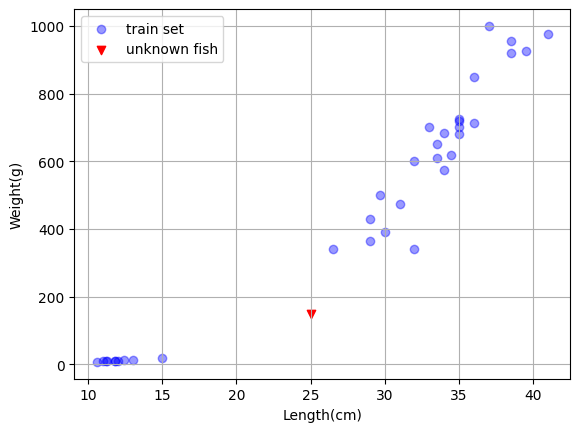

In [113]:
# 훈련 셋(X_train) 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train set', color='blue', alpha=0.4)

# 가상의 물고기(150g, 25cm) 데이터
unknown = np.array([[150, 25]])     # 주의 : 특성 배열은 반드시 2차원 배열.
plt.scatter(unknown[:, 1], unknown[:, 0], label='unknown fish', color='red', marker='v')

plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.show()

In [116]:
prediction = knn.predict(unknown)
print(prediction)

['Smelt']


In [119]:
distances, indices = knn.kneighbors(unknown)
print(distances)
print(indices)

[[130.48375378 137.17988191 138.32150953 140.62090883 140.72046759]]
[[ 7  5 15 30 11]]


In [120]:
y_train[indices[0]]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

* 생선의 두 특성(길이, 무게)는 서로 단위(cm, g)가 다르기 때문에, 값의 범위도 매우 다름.
    * 길이 범위 : 0 ~ 50 cm, 무게 범위 : 0 ~ 1,000 g
    * 특성(변수)들의 스케일이 다름!
    * 가장 가까운 이웃을 찾기 위해서 거리를 계산할 때, 생선의 길이가 거리에 미치는 영향은 생선의 무게가 거리에 미치는 영향에 비해 작음.
    * 예측을 할 때 거리 계산에 영향이 적은 변수(특성)는 무시되기 쉬움.
    * 예측 결과가 부정확해 질 수 있음.
    * 따라서, 모든 특성(변수)들이 거리 계산에 비슷한 영향을 미칠 수 있도록 스케일을 변환할 필요가 있음.

* KNN과 같이 거리 기반의 머신 러닝 알고리즘에서는, 모델을 훈련하기 전에 모든 특성(변수)들을 비슷한 스케일이 되도록 전처리(preprocessing)를 할 필요가 있음!
    * 표준화(standardization) : 훈련 셋의 평균과 표준편차를 사용해서, 평균이 0이 되고 표준편차가 1이 되도록 특성 값들의 스케일을 변환하는 것.
    * 정규화(normalization) : 훈련 셋의 최솟값과 최댓값을 사용해서, 최솟값은 0이 되고 최댓값은 1이 되도록 특성 값들의 스케일을 변환하는 것.

## 표준화(Standardization)

In [121]:
std_scaler = StandardScaler()   # 표준화 특성 스케일링 변환기 생성

In [122]:
std_scaler.fit(X_train)     # 표준화하기 위해서 필요한 훈련 셋의 평균과 표준편차를 찾음.

StandardScaler()

In [125]:
std_scaler.mean_    # 훈련 세트의 무게의 평균, 길이의 평균
                    #> [무게의 평균, 길이의 평균]

array([472.92571429,  27.66571429])

In [127]:
std_scaler.var_     #> [무게의 분산, 길이의 분산]

array([1.13460505e+05, 1.07024539e+02])

In [128]:
X_tr_scaled = std_scaler.transform(X_train)     # 표준화 특성 스케일링 수행.

In [129]:
X_tr_scaled[:5, :]

array([[ 0.08037753,  0.19663928],
       [-1.37818283, -1.58195193],
       [-1.38322976, -1.64961573],
       [ 1.11944964,  0.80561344],
       [-1.37491718, -1.59161819]])

훈련 셋에서만 fit을 하고 transform을 두 번 호출함.
테스트 셋의 평균과 분산을 추가로 설정하지 않음.
(테스트 셋은 모집단의 분산과 평균과 동일하다고 가정하기 때문)

In [131]:
X_te_scaled = std_scaler.transform(X_test)      # 테스트 셋 표준화

In [132]:
X_te_scaled[:5, :]

array([[-1.38174537, -1.65928198],
       [-1.34552628, -1.29196423],
       [-0.06806134,  0.19663928],
       [ 0.08037753,  0.37063189],
       [ 0.37725527,  0.41896318]])

In [135]:
knn = KNeighborsClassifier()
knn.fit(X_tr_scaled, y_train)
print('train acc:', knn.score(X_tr_scaled, y_train))
print('test acc:', knn.score(X_te_scaled, y_test))

train acc: 1.0
test acc: 1.0
